In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\nitya\Desktop\Learnig Met\Excel\2020-2025.csv")

In [3]:
df.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [4]:
df.isnull().sum()

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64

In [5]:
df.shape

(196, 7)

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(189, 7)

In [12]:
df.isnull().sum()

Country    0
2020       0
2021       0
2022       0
2023       0
2024       0
2025       0
dtype: int64

In [14]:
df.describe()

,2020,2021,2022,2023,2024,2025
count,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02
mean,4.514222e+05,5.151044e+05,5.367216e+05,5.605903e+05,5.821778e+05,5.991414e+05
std,1.977386e+06,2.249103e+06,2.377764e+06,2.484240e+06,2.593048e+06,2.693421e+06
min,5.200000e+01,6.200000e+01,6.100000e+01,6.300000e+01,6.500000e+01,6.500000e+01
25%,8.628000e+03,9.484000e+03,1.253100e+04,1.240200e+04,1.337000e+04,1.421400e+04
50%,3.543200e+04,3.820900e+04,4.195300e+04,4.395800e+04,4.694300e+04,4.782900e+04
75%,2.105410e+05,2.562260e+05,2.804740e+05,2.897810e+05,2.890700e+05,3.032930e+05
max,2.135412e+07,2.368118e+07,2.600690e+07,2.772072e+07,2.918490e+07,3.050722e+07


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

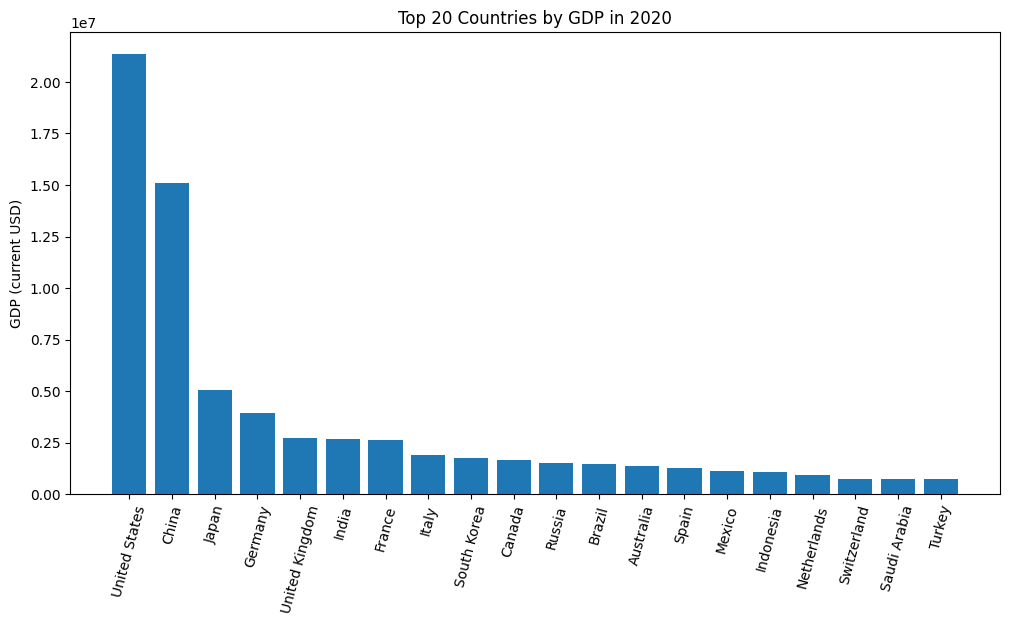

In [17]:
top20_2020 = df[['Country', '2020']].sort_values(by='2020', ascending=False).head(20)
plt.figure(figsize=(12,6))
plt.bar(top20_2020['Country'], top20_2020['2020'])
plt.xticks(rotation=75)
plt.title("Top 20 Countries by GDP in 2020")
plt.ylabel("GDP (current USD)")
plt.show()

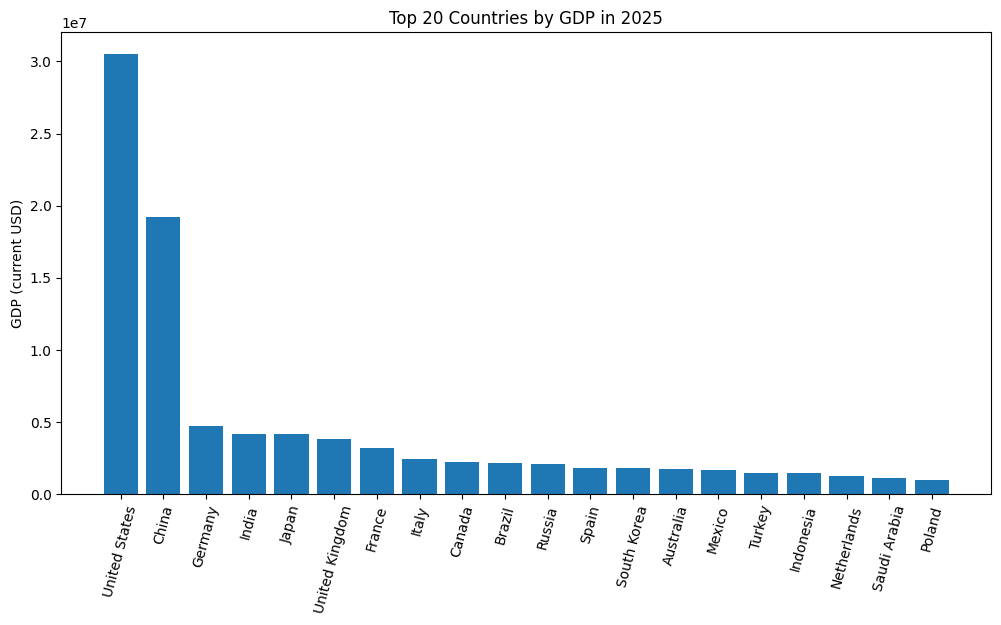

In [18]:
top20_2025 = df[['Country', '2025']].sort_values(by='2025', ascending=False).head(20)
plt.figure(figsize=(12,6))
plt.bar(top20_2025['Country'], top20_2025['2025'])
plt.xticks(rotation=75)
plt.title("Top 20 Countries by GDP in 2025")
plt.ylabel("GDP (current USD)")
plt.show()

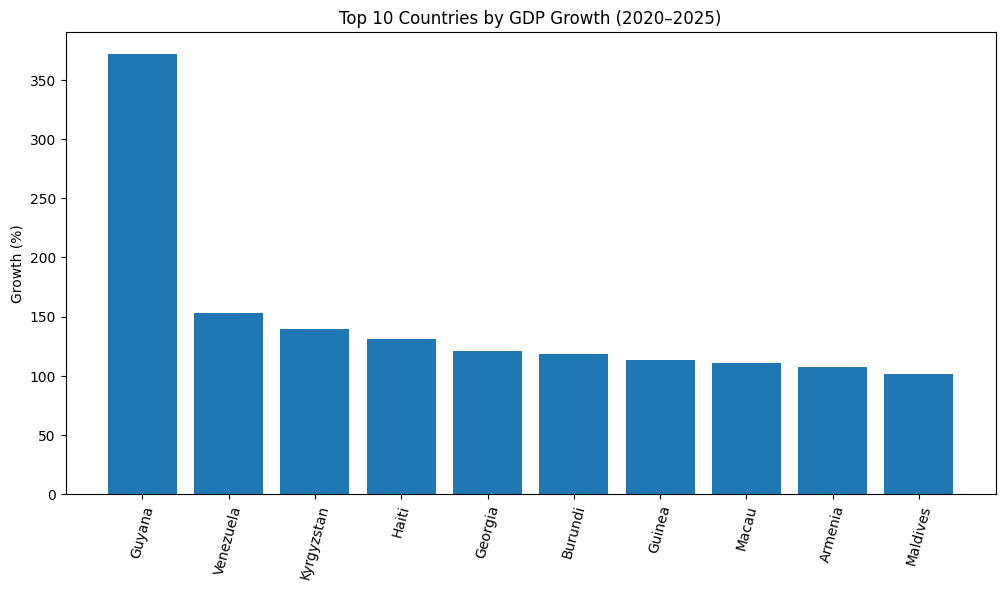

In [19]:
df['Change_2020_2025_%'] = ((df['2025'] - df['2020']) / df['2020']) * 100
df[['Country', '2020', '2025', 'Change_2020_2025_%']].sort_values(by='Change_2020_2025_%', ascending=False).head(10)

top10_growth = df.sort_values(by='Change_2020_2025_%', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top10_growth['Country'], top10_growth['Change_2020_2025_%'])
plt.xticks(rotation=75)
plt.title("Top 10 Countries by GDP Growth (2020–2025)")
plt.ylabel("Growth (%)")
plt.show()

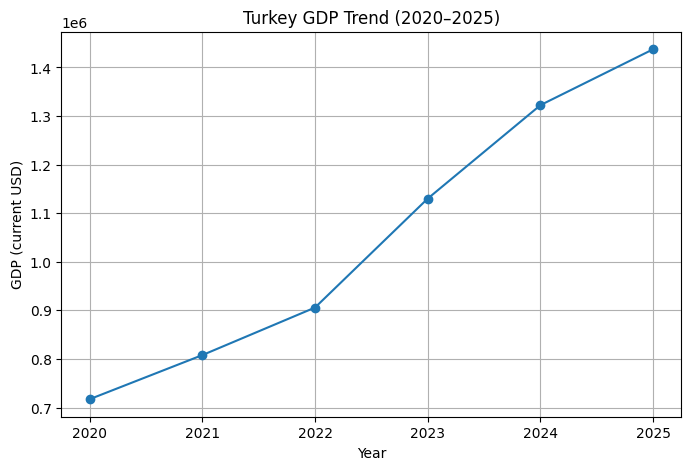

In [20]:
turkey = df[df['Country'] == 'Turkey'].iloc[0]
years = [2020, 2021, 2022, 2023, 2024, 2025]
values = [turkey[str(y)] for y in years]
plt.figure(figsize=(8,5))
plt.plot(years, values, marker='o')
plt.title("Turkey GDP Trend (2020–2025)")
plt.xlabel("Year")
plt.ylabel("GDP (current USD)")
plt.grid(True)
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np
years = np.array([2020, 2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
df['2026_pred'] = np.nan
for i, row in df.iterrows():
    values = row[['2020', '2021', '2022', '2023', '2024', '2025']].values.astype(float)
    
    model = LinearRegression()
    model.fit(years, values)

    pred_2026 = model.predict(np.array([[2026]]))[0]
    df.at[i, '2026_pred'] = pred_2026
df[['Country', '2025', '2026_pred']].head(10)

,Country,2025,2026_pred
1,Albania,28372.0,3.164953e+04
2,Algeria,268885.0,3.043024e+05
3,Andorra,4035.0,4.404067e+03
4,Angola,113343.0,1.350130e+05
5,Antigua and Barbuda,2373.0,2.595467e+03
6,Argentina,683533.0,7.717691e+05
7,Armenia,26258.0,3.108007e+04
8,Aruba,4100.0,4.550067e+03
9,Australia,1771681.0,1.924333e+06
10,Austria,534301.0,5.588297e+05


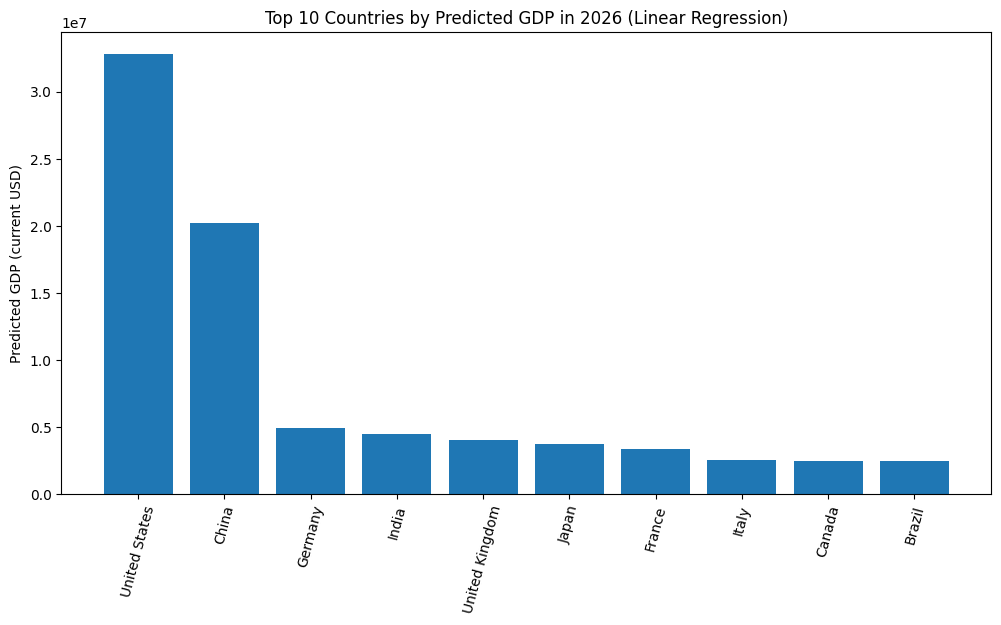

In [22]:
top10_2026 = df[['Country', '2026_pred']].sort_values(by='2026_pred', ascending=False).head(10)
top10_2026
plt.figure(figsize=(12,6))
plt.bar(top10_2026['Country'], top10_2026['2026_pred'])
plt.xticks(rotation=75)
plt.title("Top 10 Countries by Predicted GDP in 2026 (Linear Regression)")
plt.ylabel("Predicted GDP (current USD)")
plt.show()

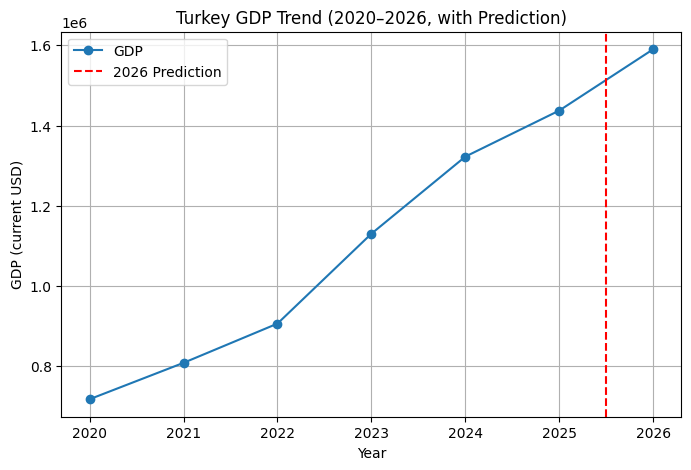

In [23]:
turkey = df[df['Country'] == 'Turkey'].iloc[0]

years = [2020, 2021, 2022, 2023, 2024, 2025]
values = [turkey[str(y)] for y in years]

gdp_2026 = turkey['2026_pred']

years_extended = years + [2026]
values_extended = values + [gdp_2026]


plt.figure(figsize=(8,5))
plt.plot(years_extended, values_extended, marker='o', label="GDP")
plt.axvline(2025.5, color='red', linestyle='--', label="2026 Prediction")
plt.title("Turkey GDP Trend (2020–2026, with Prediction)")
plt.xlabel("Year")
plt.ylabel("GDP (current USD)")
plt.grid(True)
plt.legend()
plt.show()

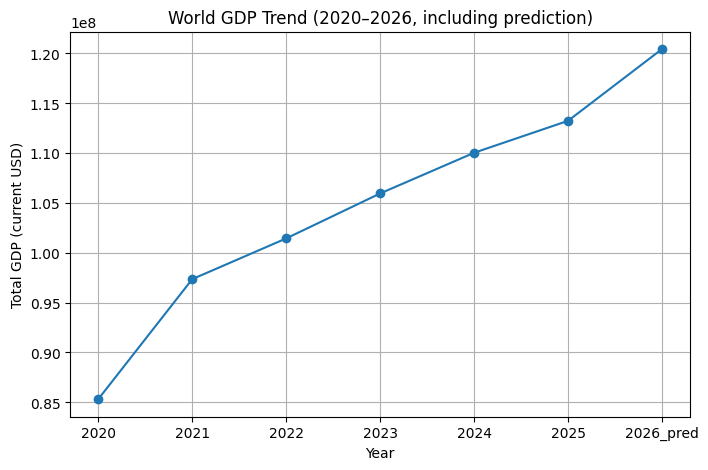

In [24]:
world_gdp = df[['2020','2021','2022','2023','2024','2025','2026_pred']].sum()

years = world_gdp.index.tolist()
values = world_gdp.values

plt.figure(figsize=(8,5))
plt.plot(years, values, marker='o')
plt.title("World GDP Trend (2020–2026, including prediction)")
plt.xlabel("Year")
plt.ylabel("Total GDP (current USD)")
plt.grid(True)
plt.show()